<a href="https://colab.research.google.com/github/yoshitha1209/Machine-Learning/blob/main/23003lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1,A2,A3

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("/content/Lab Session Data.xlsx", usecols=['Customer','Candies (#)','Mangoes (Kg)','Milk Packets (#)','Payment (Rs)'])
print("Contents in csv file:\n", df)
A=np.array([df['Candies (#)'],df['Mangoes (Kg)'],df['Milk Packets (#)']]).transpose()
print(A)
C=np.array([df['Payment (Rs)']]).transpose()
print(C)
print("Dimensionality",A.shape[1])
print("Number of vectors",A.shape[0])
print("Rank",np.linalg.matrix_rank(A))
print("Cost",np.matmul(np.linalg.pinv(A),C))
def classifier(C):
  payment=df.groupby('Customer')['Payment (Rs)'].sum()
  classify=payment.apply(lambda x:'Rich' if x>200 else 'Poor')
  return classify
classifier(C)

Contents in csv file:
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Dimensionality 

,Payment (Rs)
Customer,
C_1,Rich
C_10,Poor
C_2,Rich
C_3,Rich
C_4,Poor
C_5,Rich
C_6,Poor
C_7,Rich
C_8,Rich


A4





Contents in csv file:
              Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.002

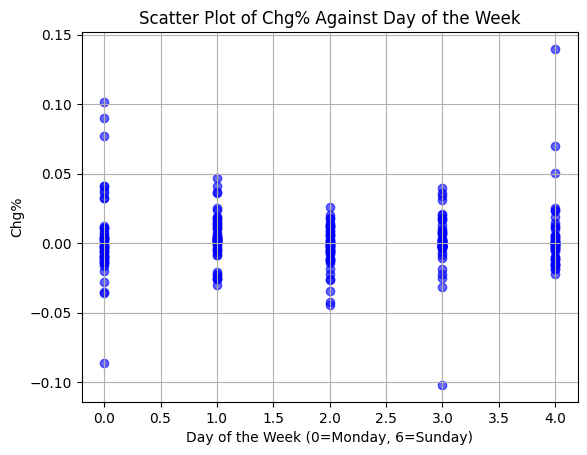

In [4]:
import statistics
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("/content/Lab Session Data.xlsx", sheet_name='IRCTC Stock Price',usecols=['Date','Month','Day','Price','Open','High','Low','Volume','Chg%'])
print("Contents in csv file:\n", df)
print("Mean",statistics.mean(df['Price']))
print("Varience",statistics.variance(df['Price']))
def wednesday(df):
  wed=df[df['Day']=='Wed']
  wed_mean=statistics.mean(wed['Price'])
  pop_mean=statistics.mean(df['Price'])
  return wed_mean,pop_mean,abs(wed_mean-pop_mean)
print(wednesday(df))
def april(df):
  april=df[df['Month']=='Apr']
  april_mean=statistics.mean(april['Price'])
  ap_pop_mean=statistics.mean(df['Price'])
  return april_mean,ap_pop_mean,abs(april_mean-ap_pop_mean)
print(april(df))
loss_probability=sum(df['Chg%'].apply(lambda x: x < 0))/len(df)
print("Loss Probability:",loss_probability)
def profit_wednesday(df):
  profit_wednesdays=sum(df[(df['Day']=='Wed')]['Chg%'].apply(lambda x: x > 0))
  total_wednesdays=len(df[df['Day']=='Wed'])
  profit_probability_wednesday = profit_wednesdays / total_wednesdays
  print(profit_probability_wednesday)
profit_wednesday(df)
def conditional_probability(df):
  total_days=len(df)
  profit_wednesdays=sum(df[(df['Day']=='Wed')]['Chg%'].apply(lambda x: x > 0))
  total_profit_days = sum(df['Chg%'].apply(lambda x: x > 0))
  total_wednesday_days = len(df[df['Day'] == 'Wed'])
  profit_given_wednesday = profit_wednesdays / total_wednesday_days
  print(profit_given_wednesday)
conditional_probability(df)
df['Date'] = pd.to_datetime(df['Date'])
df['DayNum'] = df['Date'].dt.weekday
plt.scatter(df['DayNum'], df['Chg%'], alpha=0.6, color='blue')
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Chg%")
plt.title("Scatter Plot of Chg% Against Day of the Week")
plt.grid(True)
plt.show()

A5

In [23]:
import pandas as pd
import numpy as np

df = pd.read_excel("/content/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
print(df.dtypes)
categorical=df.select_dtypes(include=['object']).columns
df[categorical]=df[categorical].apply(lambda x: pd.factorize(x)[0])
print(df.describe())
print("Missing values:\n",df.isnull().sum())
Q1,Q3=np.percentile(df.select_dtypes(include=[np.number]),[25, 75],axis=0)
IQR=Q3-Q1
print("Outliers per column:\n",((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
print("Mean:\n", df.mean(),"\nVariance:\n", df.var())



Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

A6

   Record ID  age  Condition  sex_?  sex_F  sex_M  on thyroxine_f  \
0  840801013   29         25    0.0    1.0    0.0             1.0   
1  840801014   29         25    0.0    1.0    0.0             1.0   
2  840801042   41         25    0.0    1.0    0.0             1.0   
3  840803046   36         25    0.0    1.0    0.0             1.0   
4  840803047   32         31    0.0    1.0    0.0             1.0   

   on thyroxine_t  query on thyroxine_f  query on thyroxine_t  ...  \
0             0.0                   1.0                   0.0  ...   
1             0.0                   1.0                   0.0  ...   
2             0.0                   1.0                   0.0  ...   
3             0.0                   1.0                   0.0  ...   
4             0.0                   1.0                   0.0  ...   

   TBG_9.599999  TBG_90  TBG_96  TBG_?  referral source_STMW  \
0           0.0     0.0     0.0    1.0                   0.0   
1           0.0     0.0     0.0    1

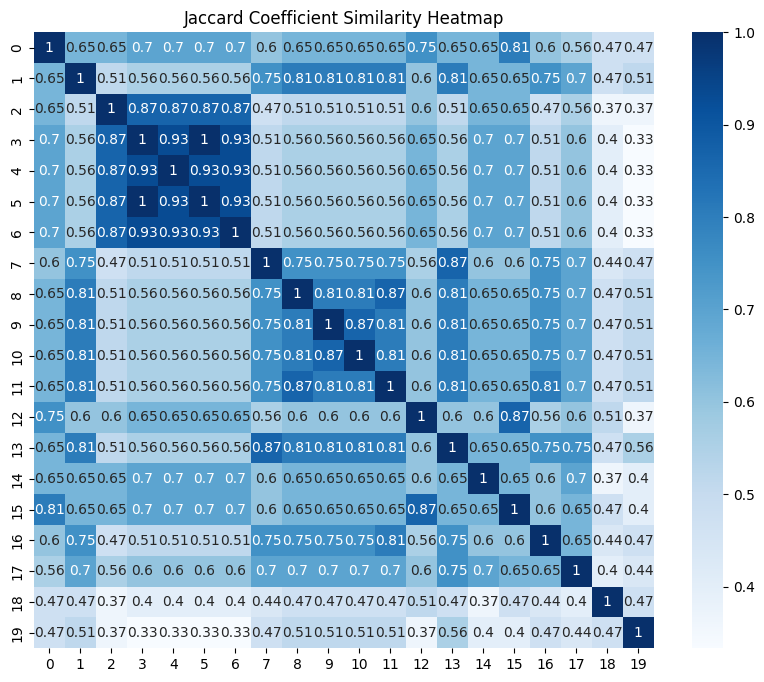

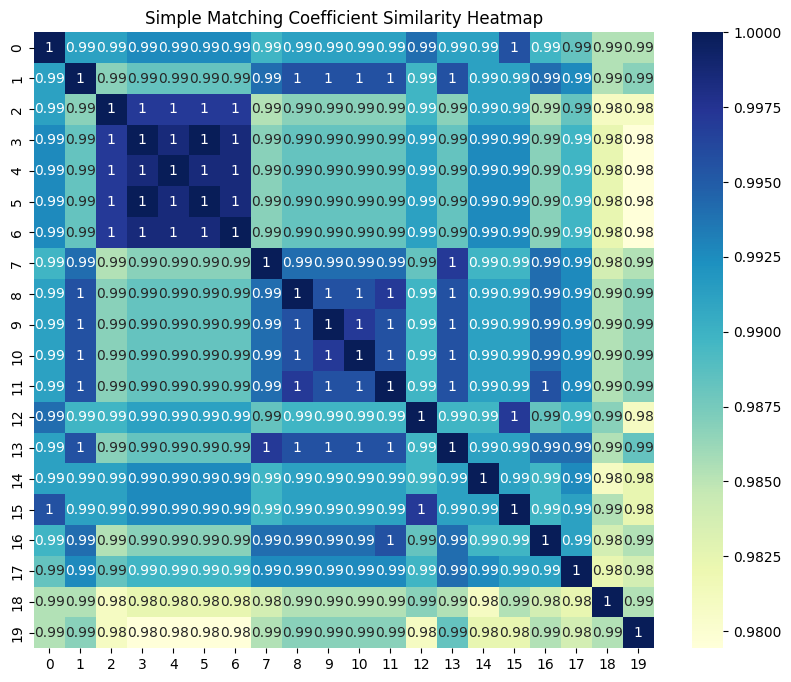

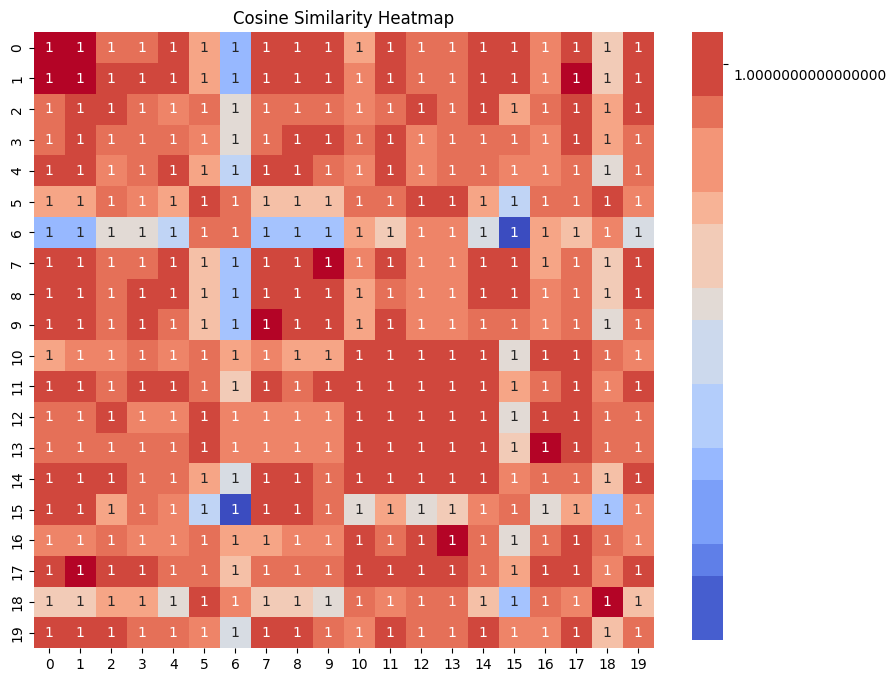

In [3]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Import LabelEncoder and OneHotEncoder
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns
path2='/content/Lab Session Data.xlsx'
df3 = pd.read_excel(path2, sheet_name="thyroid0387_UCI")


label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False)
categorical_columns = [col for col in df3.columns if df3[col].dtype == 'object']
numerical_columns = [col for col in df3.columns if df3[col].dtype in ['int64', 'float64']]
ordinal_columns = ["Condition"]
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]
df3[categorical_columns] = df3[categorical_columns].astype(str).fillna(df3.mode().iloc[0])
for col in ordinal_columns:
    if col in df3.columns:
        df3[col] = label_encoder.fit_transform(df3[col])
    else:
        print(f"Warning: {col} not found in DataFrame!")
if nominal_columns:
    encoded_array = one_hot_encoder.fit_transform(df3[nominal_columns])
    encoded_df = pd.DataFrame(encoded_array, columns=one_hot_encoder.get_feature_names_out(nominal_columns))
    df3 = pd.concat([df3, encoded_df], axis=1)
    df3.drop(columns=nominal_columns, inplace=True)
for col in numerical_columns:
    if df3[col].isnull().sum() > 0:
        if df3[col].skew() < 1:
            df3[col].fillna(df3[col].mean(), inplace=True)
        else:
            df3[col].fillna(df3[col].median(), inplace=True)

print(df3.head())

for col in numerical_columns:
    print(f"Range of {col} is {df3[col].min()} to {df3[col].max()}")
    print(f"Mean of {col}: {df3[col].mean()}")
    print(f"Variance of {col}: {df3[col].var()}")

from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
df3_minmax = df3.copy()
df3_minmax[numerical_columns] = min_max_scaler.fit_transform(df3[numerical_columns])
df3_standardized = df3.copy()
df3_standardized[numerical_columns] = standard_scaler.fit_transform(df3[numerical_columns])
print("Min-Max Scaled Data:")
print(df3_minmax.head())

print("Standardized Data:")
print(df3_standardized.head())

vec1 = df3.iloc[0]
vec2 = df3.iloc[1]
binary_columns = [col for col in df3.columns if set(df3[col].dropna().unique()).issubset({0, 1})]
vec1 = vec1[binary_columns]
vec2 = vec2[binary_columns]
f11 = sum((vec1 == 1) & (vec2 == 1))
f00 = sum((vec1 == 0) & (vec2 == 0))
f10 = sum((vec1 == 1) & (vec2 == 0))
f01 = sum((vec1 == 0) & (vec2 == 1))

JC = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0
SMC = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0


print(f"Jaccard Coefficient (JC): {JC}")
print(f"Simple Matching Coefficient (SMC): {SMC}")

vec1 = df3.iloc[0].values
vec2 = df3.iloc[1].values

dot_product = np.dot(vec1, vec2)

magnitude_vec1 = linalg.norm(vec1)
magnitude_vec2 = linalg.norm(vec2)

cosine_similarity = dot_product / (magnitude_vec1 * magnitude_vec2)
print(f"Cosine Similarity between the two vectors: {cosine_similarity}")

df20 = df3.iloc[:20]
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = np.zeros((20, 20))
def jaccard_coefficient(vec1, vec2):
    f11 = np.sum((vec1 == 1) & (vec2 == 1))
    f01 = np.sum((vec1 == 0) & (vec2 == 1))
    f10 = np.sum((vec1 == 1) & (vec2 == 0))
    return f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0

def simple_matching_coefficient(vec1, vec2):
    f11 = np.sum((vec1 == 1) & (vec2 == 1))
    f00 = np.sum((vec1 == 0) & (vec2 == 0))
    f01 = np.sum((vec1 == 0) & (vec2 == 1))
    f10 = np.sum((vec1 == 1) & (vec2 == 0))
    return (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0


def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    magnitude_vec1 = linalg.norm(vec1)
    magnitude_vec2 = linalg.norm(vec2)
    return dot_product / (magnitude_vec1 * magnitude_vec2) if (magnitude_vec1 * magnitude_vec2) != 0 else 0

for i in range(20):
    for j in range(20):
        vec1 = df20.iloc[i].values
        vec2 = df20.iloc[j].values
        jc_matrix[i][j] = jaccard_coefficient(vec1, vec2)
        smc_matrix[i][j] = simple_matching_coefficient(vec1, vec2)
        cos_matrix[i][j] = cosine_similarity(vec1, vec2)

plt.figure(figsize=(10, 8))
sns.heatmap(jc_matrix, annot=True, cmap='Blues', xticklabels=df20.index, yticklabels=df20.index)
plt.title("Jaccard Coefficient Similarity Heatmap")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(smc_matrix, annot=True, cmap='YlGnBu', xticklabels=df20.index, yticklabels=df20.index)
plt.title("Simple Matching Coefficient Similarity Heatmap")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cos_matrix, annot=True, cmap='coolwarm', xticklabels=df20.index, yticklabels=df20.index)
plt.title("Cosine Similarity Heatmap")
plt.show()

A10